## Computing blocking in contrack from long term gh anomaly

In [1]:
%matplotlib inline
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys, os, argparse
#import bottleneck

#import dask.diagnostics
#dask.diagnostics.ProgressBar().register()


## Testing cycle 4 output

In [2]:
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/z500/ngc2013_atm_pl_3h_inst_*')

In [3]:
#xr_in=xr_in.isel(plev=0,drop=True)

In [7]:
#var.to_netcdf('/scratch/b/b382006/obs/era5/factory/era5-anom-z500.nc')

In [1]:
### blocking method based on the original Code of Daniel Steinfeld 
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys


for yy in range(2020,2025):

####====INPUT
###===ifs 4.4 fesom 5
    print("1. Load files")
    xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_28-FESOM_25-cycle3/z500/ifs-c3-anom-z500_'+str(yy)+'.nc')

###===OUTPUT
###==ifs 4.4 km
#    outpath = '/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/block/ANO_Z500/'
###===IFS_28-NEMO_25
    outpath = '/scratch/b/b382006/nextgems/cycle3/IFS_28-FESOM_25-cycle3/block/ANO_Z500/'

###==subfix ifs 4.4
#    subfix='-ifs-c3-'+str(yy)+''
###==subfix ifs 28 
    subfix='-ifs-c3-'+str(yy)+''

###OUTFILE NAME
    outfile_flag='BLOCKS'+subfix+'.nc'
    outfile_table='BLOCKS'+subfix+'.csv'

###varname
    var="z"

    print('start preprocessing ...')

###varname
    var="z"

    print('start preprocessing ...')

### intitate
    block = contrack()
    block.read_xarray(xr_in)

# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
    block.set_up(force=True)
    block.ds=block.ds.compute()


# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
    block.run_contrack(variable=var,
                   threshold=160,
                   gorl='>=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

# output: variable 'flag'. 440 blocking systems tracked. Each blocking system is identified by a unique flag/ID.
###block


# Out[] Xarray dataset with 2707 time steps.
#            Available fields: z, z_height, anom, flag

# Hint: In case you want to use a more objective threshold, e.g., the 90th percentile of the Z500 anomaly winter distribution over 50¬∞-80¬∞N, do:
# threshold = block['anom'].sel(latitude=slice(80, 50)).quantile([0.90], dim='time').mean() # 177gmp

# save to disk
    block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
    block_df = block.run_lifecycle(flag='flag', variable=var)
    block_df.to_csv(outpath+'/'+outfile_table, index=False)




1. Load files


INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
81 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
96 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
78 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
63 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
67 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



In [6]:
#variable='z'
#var = xr.Variable(
#            xr_in[variable].dims,
#            anom_gh,
#            attrs={
#                'units': 'm',
#                'long_name': 'Geopotential Height Anomaly',
#                'standard_name': 'geopotential height anomaly',
#                'history': ' '.join([
#                    'Calculated from {} with input attributes:',
#                    'smoothing time steps = {},',
#                    'climatology = {}.'])
#                    .format(variable, smooth, clim)}
#        )

## Compute anomalies

In [24]:
##testing contrack
#xr_in=xr.open_dataset("/scratch/b/b382006/obs/era5/factory/era5-anom-z500_1999.nc")
xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/z/6H/z500_IFS_9-FESOM_5-production_204*')

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [25]:
xr_in

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 14612)
Coordinates:
  * lon      (lon) float64 -179.0 -178.0 -177.0 -176.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * time     (time) datetime64[ns] 2040-01-01 ... 2049-12-31T18:00:00
Data variables:
    z        (time, lat, lon) float64 dask.array<chunksize=(124, 181, 360), meta=np.ndarray>

In [26]:
### compute climatology
window=31
groupby="dayofyear"
clim = xr_in['z'].groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))
#
#    ### compute anomaly
smooth=8
groupby='dayofyear'
anom=(xr_in['z'].groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()
#
#    ### cts for computing geopotential height
g = 9.80665  # m s**-2
anom_gh=anom/g
#    ### attributes
anom_gh.attrs['units'] = 'm'
anom_gh.attrs['long_name']= 'Geopotential Height Anomaly'


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


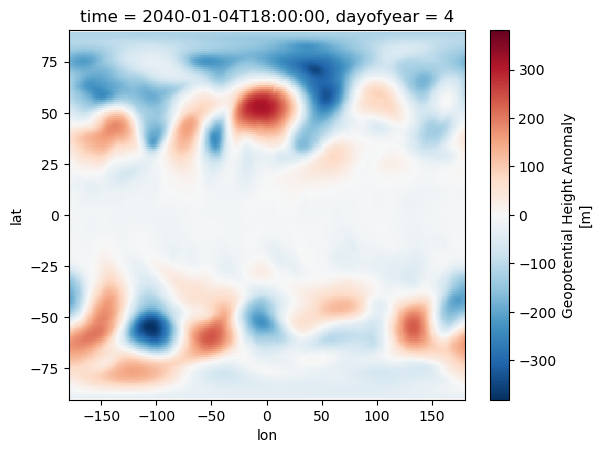

In [27]:
prefix="ifs-production"
outdir="/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/zanom2/"

# SH reverse sign
#anom[:,:96,:] = anom[:,:96,:] * (-1)

# set lat[0] and lat[-1] (North and South Pole) to zero, so that block cannot jump between Hemis (happens sometimes...)
anom_gh[:,0,:] = 0
anom_gh[:,-1,:] = 0
anom_gh.isel(time=15).plot()

In [28]:
### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
npers=20 ###5 days
for yy in range(int(y0),int(yn)+1):
#    print(yy)
    anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

    outfile=prefix+"-anom-z500_"+str(yy)+".nc"
    print(outfile)

    anoms.to_netcdf(outdir+outfile)

ifs-production-anom-z500_2040.nc
ifs-production-anom-z500_2041.nc
ifs-production-anom-z500_2042.nc
ifs-production-anom-z500_2043.nc
ifs-production-anom-z500_2044.nc
ifs-production-anom-z500_2045.nc
ifs-production-anom-z500_2046.nc
ifs-production-anom-z500_2047.nc
ifs-production-anom-z500_2048.nc
ifs-production-anom-z500_2049.nc


### temporal for ICON 

In [2]:
### icon c3
xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/zg/6H/zg50000_icon_c3_6h_*')
### icon production
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/daily/zg50000_icon_prefinal_day_204*')

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [3]:
xr_in

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 7777)
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 90 89 88 87 86 85 84 83 ... -84 -85 -86 -87 -88 -89 -90
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T06:00:00 ... 2025-07-22
Data variables:
    zg       (time, lat, lon) float32 dask.array<chunksize=(4, 181, 360), meta=np.ndarray>

In [5]:
var="zg"
prefix="ngc3028"
outdir="/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/z500/"
#prefix="ngc4008"
#outdir="/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/"

print('start preprocessing ...')

    ### get rid of plev dimmension
    ##for cycle 2
    #xr_in=xr_in.isel(plev=0,drop=True)

    ### compute climatology
window=31
groupby="dayofyear"
clim = xr_in[var].groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))

start preprocessing ...


In [6]:
### compute anomaly
smooth=8
groupby='dayofyear'
anom_gh=(xr_in[var].groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()

    ### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
npers=20 ###5 days


In [7]:
for yy in range(int(y0),int(yn)+1):
        anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

        outfile=prefix+"-anom-z500_"+str(yy)+".nc"
        print(outfile)

        anoms.to_netcdf(outdir+outfile)


ngc3028-anom-z500_2020.nc
ngc3028-anom-z500_2021.nc
ngc3028-anom-z500_2022.nc
ngc3028-anom-z500_2023.nc
ngc3028-anom-z500_2024.nc
ngc3028-anom-z500_2025.nc


In [18]:
#####

In [3]:
### open icon files
#ngc2013 (c2)
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/pl/run_204*/ngc2013_atm_pl*')
#var="zfull"
#prefix="ngc2013"
#outdir="/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/z500/"

In [12]:
########*********

## Compute blocks

In [38]:
### load anomalies
xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/zanom2/ifs-production-anom-z500_204*')

In [39]:
xr_in

<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 14612)
Coordinates:
  * lon        (lon) float64 -179.0 -178.0 -177.0 -176.0 ... 178.0 179.0 180.0
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * time       (time) datetime64[ns] 2040-01-01 ... 2049-12-31T18:00:00
    dayofyear  (time) int64 dask.array<chunksize=(1464,), meta=np.ndarray>
Data variables:
    z          (time, lat, lon) float64 dask.array<chunksize=(1464, 181, 360), meta=np.ndarray>

In [40]:
###===OUTPUT
#outpath = '/work/bm1235/b382006/era5/block/ANO_Z500'


###==subfix era5
#subfix='-era5-ano_6h'

###OUTFILE NAME
#outfile_flag='BLOCKS'+subfix+'.nc'
#outfile_table='BLOCKS'+subfix+'.csv'

In [41]:
###change to yyyy mm dd
#xr_in['time']=xr_in.indexes['time'].normalize()
#xr_in

In [42]:
## rename zfull
#xr_in=xr_in.rename({'zfull':'z_height'})
#xr_in

In [43]:
### Take geopotential
#in_z_500=xr_in.z_height.sel(plev=50000.0)
#z_dataset=xr.DataArray.to_dataset(in_z_500)
#z_dataset

In [44]:
### intitate
block = contrack()
#block.read_xarray(z_dataset)
block.read_xarray(xr_in)

In [45]:
## calculate geopotential height
#block.calculate_gph_from_gp(gp_name='z',
#                            gp_unit='m**2 s**-2',
#                            gph_name='z_height')
#
# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



In [46]:
block.ds = block.ds.compute() ### look at this!
#block.time

In [47]:
#block

In [48]:
# calculate Z500 anomaly (temporally smoothed with a 2‚Äâd running mean) with respect to the 31-day running mean (long-term: 30 years) climatology
#block.calc_anom(variable='z_height',
#                smooth=8,
#                window=31,
#                groupby='dayofyear')

In [49]:
# Hint: Use 'clim=...' to point towards an existing climatological mean (useful for weather forecasts)
# output: variable 'anom'.

# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
block.run_contrack(variable='z',
                   threshold=160,
                   gorl='>=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
737 contours tracked


In [50]:
yy0=int(block['time'].time[0].dt.year)
yyn=int(block['time'].time[-1].dt.year)


In [51]:
print(yy0,yyn)

2040 2049


In [52]:
###===IFS_28-NEMO_25
outpath = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002'

###==subfix ifs 4.4
#    subfix='-ifs-c3-'+str(yy)+''
###==subfix ifs 28 
subfix='-ifs-production-'+str(yy0)+'-'+str(yyn)+''

###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'
# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')



In [53]:
var='z'
###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable=var)
block_df.to_csv(outpath+'/'+outfile_table, index=False)

INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



### *********temporal (computing ICON)

In [3]:
### differents periods
y0=2020
yn=2026
for yy in range(int(y0),int(yn)+1):

####====INPUT
###===ngc2013 time missed solve???
    print("1. Load files")
    xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/z500/ngc3028-anom-z500_'+str(yy)+'.nc')
###=== ngc4008
#    xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/ngc4008-anom-z500_'+str(yy)+'.nc')

###===OUTPUT
###==ngc2013
    outpath = '/scratch/b/b382006/nextgems/cycle3/ngc3028/block/ANO_Z500/'
###=== ngc3028
#    outpath = '/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/'


###==subfix ngc2013
#    subfix='-icon-ngc2013-'+str(yy)+''
###==subfix ngc3028
    subfix='-icon-ngc3028-'+str(yy)+''
###==subfix ngc4008
#    subfix='-icon-ngc4008-'+str(yy)+''

###OUTFILE NAME
    outfile_flag='BLOCKS'+subfix+'.nc'
    outfile_table='BLOCKS'+subfix+'.csv'

###varname
#    var="zfull" ##ngc2013
    var="zg"    ##ngc3028
    print('start preprocessing ...')

### intitate
    block = contrack()
    block.read_xarray(xr_in)

# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
    block.set_up(force=True)
    block.ds=block.ds.compute()


# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
    block.run_contrack(variable=var,
                   threshold=160,
                   gorl='>=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

# output: variable 'flag'. 440 blocking systems tracked. Each blocking system is identified by a unique flag/ID.
###block


# Out[] Xarray dataset with 2707 time steps.
#            Available fields: z, z_height, anom, flag

# Hint: In case you want to use a more objective threshold, e.g., the 90th percentile of the Z500 anomaly winter distribution over 50¬∞-80¬∞N, do:
# threshold = block['anom'].sel(latitude=slice(80, 50)).quantile([0.90], dim='time').mean() # 177gmp

# save to disk
    block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
    block_df = block.run_lifecycle(flag='flag', variable=var)
    block_df.to_csv(outpath+'/'+outfile_table, index=False)

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
82 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
81 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
76 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
58 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
64 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
34 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files


FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/z500/ngc3028-anom-z500_2026.nc'

### temporal (comouting  ERA5 blocks)

In [5]:
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm


#### FUNCTIONS #####
def print_now():
    print('time:'+str(datetime.datetime.now()))

In [9]:
####====INPUT
xr_in=xr.open_mfdataset('/scratch/b/b382006/obs/era5/vapv/VAPV_era5_regio_prl_*',concat_dim='time',combine='nested')

###===OUTPUT
outpath = '/scratch/b/b382006/obs/era5/block/'

###==subfix era5
subfix='-era5-ano_1980-1989'


###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'


print('start preprocessing ...')

###change to yyyy mm dd
xr_in['time']=xr_in.indexes['time'].normalize()

start preprocessing ...


In [10]:
xr_in

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, time: 14612)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-01-01 ... 1989-12-31
Data variables:
    VAPV       (time, latitude, longitude) float32 dask.array<chunksize=(4, 181, 360), meta=np.ndarray>
Attributes:
    title:    ERA5
    source:   giub@giub.unibe.ch
    comment:  to analyse weather systems

In [11]:
### intitate
block = contrack()
block.read_xarray(xr_in)


# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)
block.ds=block.ds.compute()

### compute anomalies
print_now()
print('computing vapv clim/anom')
block.calc_anom(variable='VAPV',
        smooth=8,
        window=31,
        groupby='dayofyear')

####Identify and track blocks
block.run_contrack(variable='anom',
                   threshold=-1,
                   gorl='<=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable='anom')
block_df.to_csv(outpath+'/'+outfile_table, index=False)

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Calculating climatological mean from VAPV...


time:2024-03-17 19:56:18.593296
computing vapv clim/anom


INFO: Calculating Anomaly... DONE
INFO: 
Run ConTrack 
########### 
    threshold:    <= -1 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1910 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    anom
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'



## Analyzing outputs from ERA5

In [24]:
###IFS production
blocks_vapv_old=xr.open_dataset("/work/bm1235/b382006/era5/block/bkp_ANO_VAPV/BLOCKS-era5-ano_p1.nc")
blocks_vapv_new=xr.open_dataset("/work/bm1235/b382006/era5/block/ANO_VAPV/BLOCKS-era5-ano_1990-1999.nc")

In [25]:
sufix='DJF'
blocks_old = blocks_vapv_old.sel(time=blocks_vapv_old.time.dt.month.isin([1, 2, 12]))

ntime_sims=len(blocks_old.time)

### accumulate ngc2013
ntime_sims =len(blocks_old.time)
acc_old = xr.where(blocks_old['flag']>1,1,0).sum(dim='time')/ntime_sims*100

In [26]:
sufix='DJF'
blocks_new = blocks_vapv_new.sel(time=blocks_vapv_new.time.dt.month.isin([1, 2, 12]))

ntime_sims=len(blocks_new.time)

### accumulate ngc2013
ntime_sims =len(blocks_new.time)
acc_new = xr.where(blocks_new['flag']>1,1,0).sum(dim='time')/ntime_sims*100

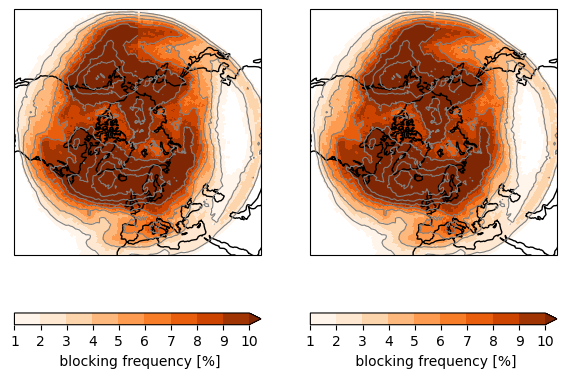

In [33]:
# plotting blocking frequency (in %) for winter over Northern Hemisphere
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7, 5), subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_old).plot(ax=ax1,levels=np.arange(1,11,1), cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_old).plot.contour(ax=ax1,colors='grey', linewidths=0.8, levels=np.arange(2,18,2), transform=ccrs.PlateCarree())
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
(acc_new).plot(ax=ax2,levels=np.arange(1,11,1), cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_new).plot.contour(ax=ax2,colors='grey', linewidths=0.8, levels=np.arange(2,18,2), transform=ccrs.PlateCarree())
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();

## Anlyzing outputs from IFS production runs

In [2]:
###IFS production
#blocks_ifs=xr.open_mfdataset("/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-*.nc")
###ICON production
blocks_ifs=xr.open_mfdataset("/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/BLOCKS-icon-ngc4008-*.nc")

In [123]:
y0='2044' ##2020, 2039, 2044
yn='2049' ##2025, 2044, 2049
sample=blocks_ifs.sel(time=slice(y0,yn))
sample

<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 2192)
Coordinates:
  * lon        (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat        (lat) int64 90 89 88 87 86 85 84 ... -84 -85 -86 -87 -88 -89 -90
  * time       (time) datetime64[ns] 2044-01-01 2044-01-02 ... 2049-12-31
    dayofyear  (time) int64 dask.array<chunksize=(366,), meta=np.ndarray>
Data variables:
    flag       (time, lat, lon) int32 dask.array<chunksize=(366, 181, 360), meta=np.ndarray>

In [130]:
# select only winter months January, February and December
### select seasons
#winter=[10,11,12,1,2,3]
#summer=[4,5,6,7,8,9]
sufix='summer'
if sufix=='winter':
    season=[10,11,12,1,2,3]
if sufix=='summer':
    season=[4,5,6,7,8,9]   
##full
#blocks_sims = sample
##season
blocks_sims = sample.sel(time=sample.time.dt.month.isin(season))

ntime_sims=len(blocks_sims.time)

### accumulate 
ntime_sims =len(blocks_sims.time)
acc_sims = xr.where(blocks_sims['flag']>1,1,0).sum(dim='time')/ntime_sims*100

In [131]:
###Save season as netcdf IFS
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+y0+'-'+yn+'_'+sufix+'.nc')
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+y0+'-'+yn+'.nc')

###Save season as netcdf ICON
acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+y0+'-'+yn+'_'+sufix+'.nc')
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+y0+'-'+yn+'.nc')

/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/b/b382006/.co

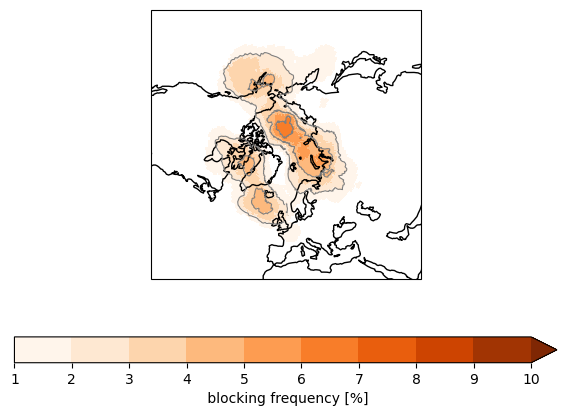

In [132]:
# plotting blocking frequency (in %) for winter over Northern Hemisphere
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_sims).plot(levels=np.arange(1,11,1), cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_sims).plot.contour(colors='grey', linewidths=0.8, levels=np.arange(2,18,2), transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax.coastlines();

In [12]:
## Make difference plot 
## ngc4008,IFS_9-FESOM_5-production
#model='ngc4008'

In [3]:
###difference |2044 to 2049 |2040 to 2044 | 2034 to 2039 |2030 to 2034 | 2025 to 2030 |
last0='2044'
lastn='2049'

In [69]:
### Load frequency
#feq_ifs_first=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2025.nc').load()
#feq_ifs_last=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'.nc').load()

#feq_ifs_first_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2025_winter.nc').load()
#feq_ifs_last_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'_winter.nc').load()

#feq_ifs_first_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2025_summer.nc').load()
#feq_ifs_last_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'_summer.nc').load()

feq_ifs_first=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2025.nc').load()
feq_ifs_last=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'.nc').load()

feq_ifs_first_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2025_winter.nc').load()
feq_ifs_last_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'_winter.nc').load()

feq_ifs_first_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2025_summer.nc').load()
feq_ifs_last_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'_summer.nc').load()

In [70]:
### Compute change
chg_ifs =  feq_ifs_last - feq_ifs_first
chg_ifs_djf =  feq_ifs_last_djf - feq_ifs_first_djf
chg_ifs_jja =  feq_ifs_last_jja - feq_ifs_first_jja
chg_ifs_jja

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 90 89 88 87 86 85 84 83 ... -84 -85 -86 -87 -88 -89 -90
Data variables:
    flag     (lat, lon) float64 -2.186 -2.186 -2.186 ... 0.1821 0.1821 0.1821

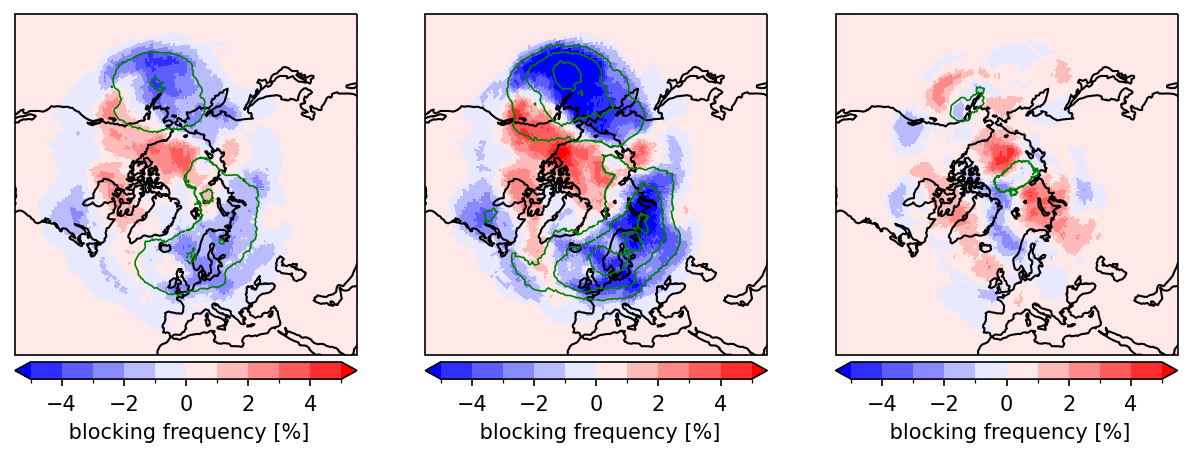

In [71]:
### changes
import matplotlib.patches as mpatches

#clevels=[-8,-6,-4,-2,-1,1,2,4,6,8]
clevels=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
mlevels=np.arange(2,18,2)
exts=[-180, 180, 30, 90]
###South
#clevels=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
#mlevels=np.linspace(0,2,9)
#exts=[-180, 180, -30, -90]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})

###==== first panel
im=chg_ifs.flag.plot(ax=ax1,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal','pad':0.01})
feq_ifs_first.flag.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax1.set_extent(exts, crs=ccrs.PlateCarree())
ax1.coastlines()
#ax1.set_title('a) IFS (2044 to 2049) - (2020 to 2025)')

###==== second panel
im=chg_ifs_djf.flag.plot(ax=ax2,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal','pad':0.01})
feq_ifs_first_djf.flag.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax2.set_extent(exts, crs=ccrs.PlateCarree())
ax2.coastlines()
#ax2.set_title('b) IFS (2044 to 2049) - (2020 to 2025)')

###==== third panel
im=chg_ifs_jja.flag.plot(ax=ax3,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal','pad':0.01})
feq_ifs_first_jja.flag.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax3.set_extent(exts, crs=ccrs.PlateCarree())
ax3.coastlines()
#ax3.set_title('c) IFS (2044 to 2049) - (2020 to 2025)')


#ax2.add_patch(mpatches.Rectangle(xy=[-5, 40], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=2,transform=ccrs.PlateCarree())) 
#ax2.add_patch(mpatches.Rectangle(xy=[-185, 35], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="yellow",linewidth=2,transform=ccrs.PlateCarree()))
# 
#plt.savefig('IFS-production_changing.png')

In [74]:
from scipy.ndimage import gaussian_filter
import cartopy.util as cutil
import matplotlib.patches as mpatches
import matplotlib.path as mpath

### BIAS mean ensamble
chg_ifs_fil = gaussian_filter(chg_ifs_jja['flag'], sigma=0.5)
feq_ifs_first_fil = gaussian_filter(feq_ifs_first_jja['flag'], sigma=1.0)

### fill gap
chg_ifs_new, clon = cutil.add_cyclic(chg_ifs_fil, chg_ifs.lon)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

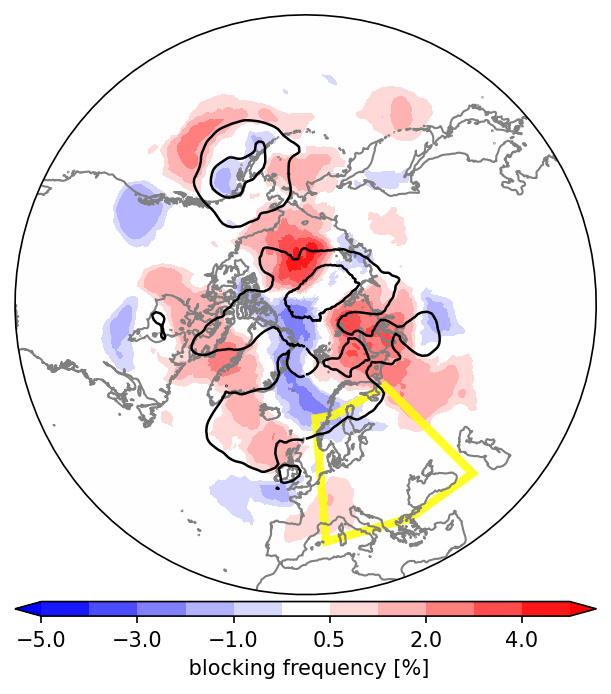

In [75]:
###
### changes
import matplotlib.patches as mpatches

#clevels=[-8,-6,-4,-2,-1,1,2,4,6,8]
clevels=[-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
mlevels=np.arange(2,18,2)

#fig, ax3 = plt.subplots(1, 3, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig, ax3 = plt.subplots(1, 1, figsize=(5, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax3.set_boundary(circle, transform=ax3.transAxes)

###==== second panel
#im=chg_ifs.flag.plot(ax=ax3,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal','pad':0.01, 'aspect':50})
im =ax3.contourf(clon, chg_ifs.lat,chg_ifs_new, levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree())

#feq_ifs_first.flag.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
im2 =ax3.contour(feq_ifs_first.lon, feq_ifs_first.lat,feq_ifs_first_fil, colors='k', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())

ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
#ax3.set_title('IFS (2044 to 2049) - (2020 to 2025)')

ax3.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="yellow",linewidth=4,transform=ccrs.PlateCarree()))
#ax3.add_patch(mpatches.Rectangle(xy=[160, 50], width=30, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="yellow",linewidth=2,transform=ccrs.PlateCarree()))

plt.colorbar(im, orientation='horizontal',ticklocation='auto',pad=0.01, aspect=40,label=' blocking frequency [%]')

#plt.savefig('IFS-production_changing_djf.png')
plt.savefig('ICON-production_changing_jja.png')

In [55]:
###european blocks
#sample=blocks_ifs.sel(lat=slice(40,65),lon=slice(-5,35))
#blocks_sims = sample

In [56]:
### time serie in a region
###european blocks
#sample=blocks_ifs.sel(lat=slice(40,65),lon=slice(-5,35))
###north pacific blocks
#sample=blocks_ifs.sel(lat=slice(35,60),lon=slice(-185,-145))
#tserie = xr.where(sample['flag']>1,1,0).sum(dim=['lon','lat']).compute()
#tserie

In [57]:
###50,10 and 45,-160
#tserie=blocks_ifs['flag'].sel(lat=45,lon=-160,drop=True).compute()
#tserie=blocks_ifs['flag'].sel(lat=48,lon=10,drop=True).compute()
#tserie
#sample=xr.where(tserie>1,1,0).compute()
#trend=sample.groupby('time.year').sum()
#trend=trend/4

In [58]:
#x=np.arange(trend['year'].size)
#fit=np.polyfit(x,trend,1)
#fit_fn=np.poly1d(fit)

In [59]:
#fig,ax=plt.subplots(figsize=(10, 6), dpi=150)
##tserie[10:100].plot(color='k', linestyle='-',lw=1)
#(trend).plot(color='k', linestyle='-',lw=1)
#plt.ylabel('Number of days with blocks', fontsize=16)
#plt.plot(trend['year'],fit_fn(x),'b-',lw=1)


## Tracks

In [61]:
################################
import glob
import pandas as pd
# Get CSV files list from a folder
path = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002'
#path = "/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500"
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)


#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
ifs_df = pd.concat(accumulator)
ifs_df['year']=ifs_df.Date.str[:4]

In [62]:
### Analysis

In [63]:
### take values in the northern hemosphere lat > 0
ifs_df = ifs_df[(ifs_df['Latitude'] > 0 )]
##print(era5_df['Flag'].iloc[-1],icon_ngc2013_df['Flag'].iloc[-1],icon_ngc3028_df['Flag'].iloc[-1],IFS_4_FESOM_5_df['Flag'].iloc[-1],IFS_28_NEMO_25_df['Flag'].iloc[-1],cmip6_df['Flag'].iloc[-1])
print(ifs_df['Flag'].nunique())
print(ifs_df['Date'].nunique())

### Identifying strong blockings
test_reset=ifs_df.reset_index(drop=True)
##test_reset.loc[test_reset['Intensity'].idxmax()]
print(test_reset.loc[test_reset['Intensity'].nlargest(10).index])
##print(test_reset['Flag'].mode())
##stg_block['Intensity'].plot()

984
33760
        Flag         Date  Longitude  Latitude  Intensity         Size  year
125       16  20200216_06       -174        53     337.21  12208002.48  2020
124       16  20200216_00       -174        53     337.02  12467836.74  2020
126       16  20200216_12       -174        54     336.66  11882666.17  2020
127       16  20200216_18       -174        54     335.49  11504165.48  2020
123       16  20200215_18       -173        52     334.76  12759896.76  2020
9529    8398  20270216_00        180        57     332.61  10168856.29  2027
9530    8398  20270216_06        179        58     332.35  10147870.38  2027
35443  25819  20430202_18       -177        48     332.07   8117098.04  2043
9528    8398  20270215_18       -179        57     331.67  10204450.83  2027
35442  25819  20430202_12       -179        48     331.27   8231668.61  2043


INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


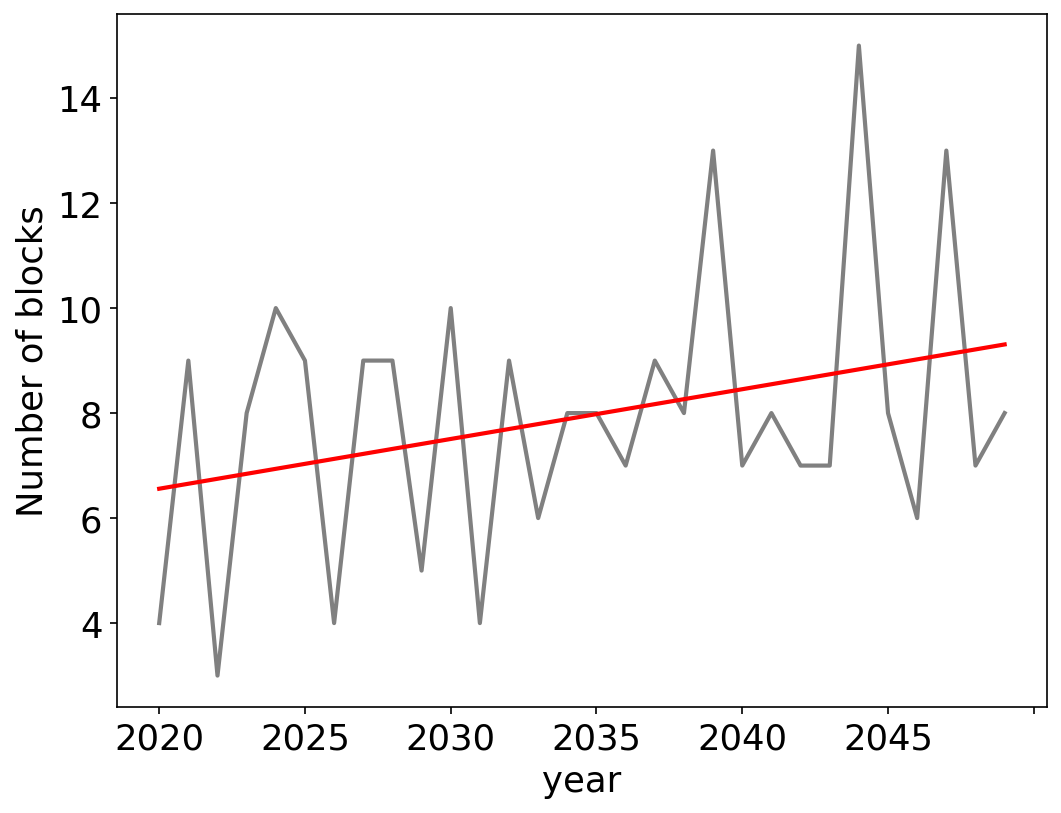

In [65]:
### Plotting 
### regions 
###xy=[5, 40], width=40, height=25,
###xy=[160, 50], width=30, height=25

### NA                                
ifs_df_td = ifs_df[(ifs_df['Latitude'] > 40 ) & (ifs_df['Latitude'] < 65 ) & (ifs_df['Longitude'] > 5 ) & (ifs_df['Longitude'] < 40 )]
### NP 
#ifs_df_td = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) & (ifs_df['Longitude'] < 180 )]
#ifs_df_td = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) ]

ifs_yy=ifs_df_td.groupby('year')['Flag'].nunique()

x=np.arange(ifs_yy.size)
##fit=tserie.polyfit(dim='time',deg=1)
##fit['polyfit_coefficients']
fit=np.polyfit(x,ifs_yy.values,1)
fit_fn=np.poly1d(fit)


### Plot
fig,ax=plt.subplots(figsize=(8, 6), dpi=150)
ifs_yy.plot(color='grey', linestyle='-',lw=2)
plt.ylabel('Number of blocks', fontsize=17)
plt.xlabel('year',fontsize=17)
plt.plot(ifs_yy.index,fit_fn(x),'r-',lw=2)

ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

plt.savefig('IFS-production_trend.png')

In [79]:
### Finding intense blockings
#ifs_yy.index

In [2]:
#timb='2043-02-02T18:00'
#timb='2044-01-16T12:00'
#timb='2024-06-04T12:00'
timb='2046-06-04T12:00'
block_ano = xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-2040-2049.nc')
ano = xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/zanom2/ifs-production-anom-z500_'+timb[0:4]+'.nc')

timc=timb[0:10]
print(timc)

2046-06-04


In [3]:
#block_ano['flag'].sel(time='2044-01-16T12:00').max()

In [4]:
import pandas as pd
###2021
block_df = pd.read_csv('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-2040-2049.csv', delimiter=',',header=0)
###2022
#block_df =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ANO_Z500/BLOCKS-icon-ngc3028-2022.csv', delimiter=',',header=0)
### Find bid (flag of most intense blockings) 
block_df.loc[block_df['Intensity'].nlargest(35).index]

Flag         Date  Longitude  Latitude  Intensity         Size
1741    529  20400721_12         67       -59     350.19   9032759.72
1742    529  20400721_18         68       -60     349.48   9033592.47
1740    529  20400721_06         66       -59     345.28   9039485.16
1743    529  20400722_00         69       -61     343.40   9007446.29
1739    529  20400721_00         65       -58     337.85   8895729.88
1744    529  20400722_06         70       -61     333.81   8847547.77
9506   3117  20430202_18       -177        48     332.07   8117098.04
9505   3117  20430202_12       -179        48     331.27   8231668.61
9507   3117  20430203_00       -176        49     328.84   8072161.62
20594  6913  20460604_12         10       -63     328.27   9145996.56
29196  9530  20481220_06        174        55     327.94   8579307.51
20593  6913  20460604_06         10       -62     327.56   9183589.40
29197  9530  20481220_12        175        55     327.29   8484697.78
9504   3117  20430202_06        180        48     327.17   8383616.64
20592  6913  20460604_00          9       -62     326.95   9101117.03
29195  9530  20481220_00        173        55     326.86   8606553.01
29198  9530  20481220_18        176        55     326.55   8309332.67
20591  6913  20460603_18          9       -61     326.51   8921311.63
1738    529  20400720_18         63       -58     325.42   8694294.16
22316  7401  20461209_12       -126        64     325.21  10276640.99
29199  9530  20481221_00        177        55     325.03   8148021.52
29211  9530  20481224_00        178        51     324.78  10337450.55
9508   3117  20430203_06       -175        49     324.71   7969229.90
22317  7401  20461209_18       -126        65     324.69  10290009.68
20590  6913  20460603_12          8       -61     324.44   8794796.89
29212  9530  20481224_06        178        51     324.22  10433230.51
29194  9530  20481219_18        172        55     324.06   8532495.92
433     114  20400221_00        -61        65     323.83  19589346.17
22315  7401  20461209_06       -127        64     323.44  10271523.41
434     114  20400221_06        -61        65     323.42  19836924.17
19424  6517  20460126_12       -174        54     322.69  11351151.38
19695  6581  20460210_18        -53        50     322.36  10130149.83
19696  6581  20460211_00        -50        50     322.36  10175743.04
17177  5860  20450605_00        -26       -52     321.93  10974837.65
29210  9530  20481223_18        178        51     321.82  10239925.42

In [5]:
#bid=9530
#bid=3117
bid=6908

mdate = timb[0:4] + timb[5:7] + timb[8:10] + '_' + timb[11:13]
lonts = np.asarray(block_df['Longitude'].iloc[np.where(block_df['Flag']==bid)])
latts = np.asarray(block_df['Latitude'].iloc[np.where(block_df['Flag']==bid)])
dates = np.asarray(block_df['Date'].iloc[np.where(block_df['Flag']==bid)]) #'20210326_12'
lonts[lonts <= 0] = lonts+360
dates

array(['20460525_18', '20460526_00', '20460526_06', '20460526_12',
       '20460526_18', '20460527_00', '20460527_06', '20460527_12',
       '20460527_18', '20460528_00', '20460528_06', '20460528_12',
       '20460528_18', '20460529_00', '20460529_06', '20460529_12',
       '20460529_18', '20460530_00', '20460530_06', '20460530_12',
       '20460530_18', '20460531_00', '20460531_06', '20460531_12',
       '20460531_18', '20460601_00', '20460601_06', '20460601_12',
       '20460601_18', '20460602_00', '20460602_06', '20460602_12',
       '20460602_18', '20460603_00', '20460603_06', '20460603_12',
       '20460603_18', '20460604_00', '20460604_06', '20460604_12',
       '20460604_18', '20460605_00', '20460605_06', '20460605_12',
       '20460605_18', '20460606_00', '20460606_06', '20460606_12',
       '20460606_18', '20460607_00', '20460607_06', '20460607_12',
       '20460607_18', '20460608_00', '20460608_06', '20460608_12',
       '20460608_18', '20460609_00', '20460609_06', '20460609_

In [6]:
print(mdate)
#2044-01-16T12:00
block_df['Flag'].iloc[np.where(block_df['Date']==mdate)]


20460604_12


20531    6908
20594    6913
Name: Flag, dtype: int64

## Plot a case

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cf
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake
import eccodes
import healpy as hp
import os

/home/b/b382006/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [44]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [45]:
# which IFS experiments are available?
print(list(cat.IFS))

['IFS_9-FESOM_5-production', 'IFS_4.4-FESOM_5-cycle3', 'IFS_9-FESOM_5-cycle3', 'IFS_9-NEMO_25-cycle3', 'IFS_28-NEMO_25-cycle3', 'IFS_28-FESOM_25-cycle3', 'IFS_4.4-FESOM_5-cycle3-nofastdata', 'IFS_4.4-FESOM_5-cycle3-fastdata', 'IFS_grids']


In [46]:
### select simulation / prefix
ifs_run='IFS_9-FESOM_5-production'
print(list(cat.IFS[ifs_run]))

['2D_hourly_healpix512', '2D_hourly_healpix512_2020s', '2D_hourly_healpix512_2030s', '2D_hourly_healpix512_2040s', '2D_daily_healpix512_ocean', '3D_hourly_healpix512', '3D_hourly_healpix512_2020', '3D_hourly_healpix512_2025', '3D_hourly_healpix512_2030', '3D_hourly_healpix512_2035', '3D_hourly_healpix512_2040', '3D_hourly_healpix512_2045', '3D_hourly_healpix512_snow', '3D_daily_healpix512_ocean', '2D_monthly_healpix512', '2D_monthly_healpix512_sst_ci_winds', '3D_monthly_healpix512', '3D_monthly_healpix512_snow', '2D_hourly_healpix128', '3D_hourly_healpix128_2020', '3D_hourly_healpix128_2025', '3D_hourly_healpix128_2030', '3D_hourly_healpix128_2035', '3D_hourly_healpix128_2040', '3D_hourly_healpix128_2045', '2D_daily_healpix128_ocean', '3D_daily_healpix128_ocean', '3D_hourly_0.25deg_2020s', '3D_hourly_0.25deg_2030s', '3D_hourly_0.25deg_2040s', '3D_hourly_native_2020s', '3D_hourly_native_2030s', '2D_monthly_0.25deg', '2D_monthly_0.25deg_snow', '2D_monthly_0.25deg_sst_ci_winds', '3D_month

In [47]:
###Load more data
lon = np.linspace(-179, 180, 360)
lat = np.linspace(-90, 90, 181)
lon2, lat2 = np.meshgrid(lon, lat)

#data = cat.IFS['IFS_9-FESOM_5-production']['3D_hourly_healpix512_2040'].to_dask()
data = cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512_2040s'].to_dask()
data

#data_example = data['z'][-1,:].sel(level=500)
#
#pix = hp.ang2pix(
#        hp.npix2nside(len(data_example)), theta=lon2, phi=lat2, nest=True, lonlat=True
#    )

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.Dataset>
Dimensions:  (time: 87682, value: 3145728)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2040-01-01 2040-01-01T01:00:00 ... 2050-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            ü™Ñüßô‚Äç‚ôÇÔ∏èüîÆ magic dataset assembly provided by gribscan.IF...

In [48]:
data_example = data['tp'].sel(time=timb)

pix = hp.ang2pix(
        hp.npix2nside(len(data_example)), theta=lon2, phi=lat2, nest=True, lonlat=True
    )

In [62]:
var='tp'
sample = np.reshape(data_example.values[pix],newshape=(1,len(lat),len(lon)))
    
        # create DataArray with proper name, dimensions, and coordinates
da = xr.DataArray(
            data=sample,
            name=var,
            dims=["time","lat", "lon"],
            coords=dict(
                lon=lon,
                lat=lat,
                time=np.atleast_1d(data['time'].sel(time=timb))
            ),
            attrs=dict(
            data[var].attrs,
            ),
            )

In [ ]:
#data_example = data['tp'].sel(time=timb)

In [72]:
var='msl'
data_example = data['msl'].sel(time=timb)

sample = np.reshape(data_example.values[pix],newshape=(1,len(lat),len(lon)))
    
        # create DataArray with proper name, dimensions, and coordinates
msl = xr.DataArray(
            data=sample,
            name=var,
            dims=["time","lat", "lon"],
            coords=dict(
                lon=lon,
                lat=lat,
                time=np.atleast_1d(data['time'].sel(time=timb))
            ),
            attrs=dict(
            data[var].attrs,
            ),
            )
#da.isel(time=0).plot()
#da*1000

In [68]:
#Plot around (2044-01-16_12)
#timb='2043-02-02T18:00'
#timb='2044-01-16T12:00'

#'20460525_18'
timb='2046-06-01T00:00'
#timb='2046-06-04T12:00'

from scipy.ndimage import gaussian_filter
import cartopy.util as cutil


### BIAS mean ensamble
###zmod_era5_fil = gaussian_filter(zmod_era5['Z_bin'], sigma=2.0)
###bias_zmod_fil = gaussian_filter(bias_zmod['Z_bin'], sigma=1.0)

ano_new, clon = cutil.add_cyclic(ano['z'].sel(time=timb), ano.lon)

block_new, clon= cutil.add_cyclic(block_ano['flag'].sel(time=timb), block_ano.lon)

In [8]:
timb[:14]
clonts=lonts[0:26]
clatts=latts[0:26] 
dates[0:24]

array(['20460525_18', '20460526_00', '20460526_06', '20460526_12',
       '20460526_18', '20460527_00', '20460527_06', '20460527_12',
       '20460527_18', '20460528_00', '20460528_06', '20460528_12',
       '20460528_18', '20460529_00', '20460529_06', '20460529_12',
       '20460529_18', '20460530_00', '20460530_06', '20460530_12',
       '20460530_18', '20460531_00', '20460531_06', '20460531_12'],
      dtype=object)

/home/b/b382006/.local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'cbar_kwargs'
  result = super().contourf(*args, **kwargs)


<Figure size 2100x900 with 0 Axes>

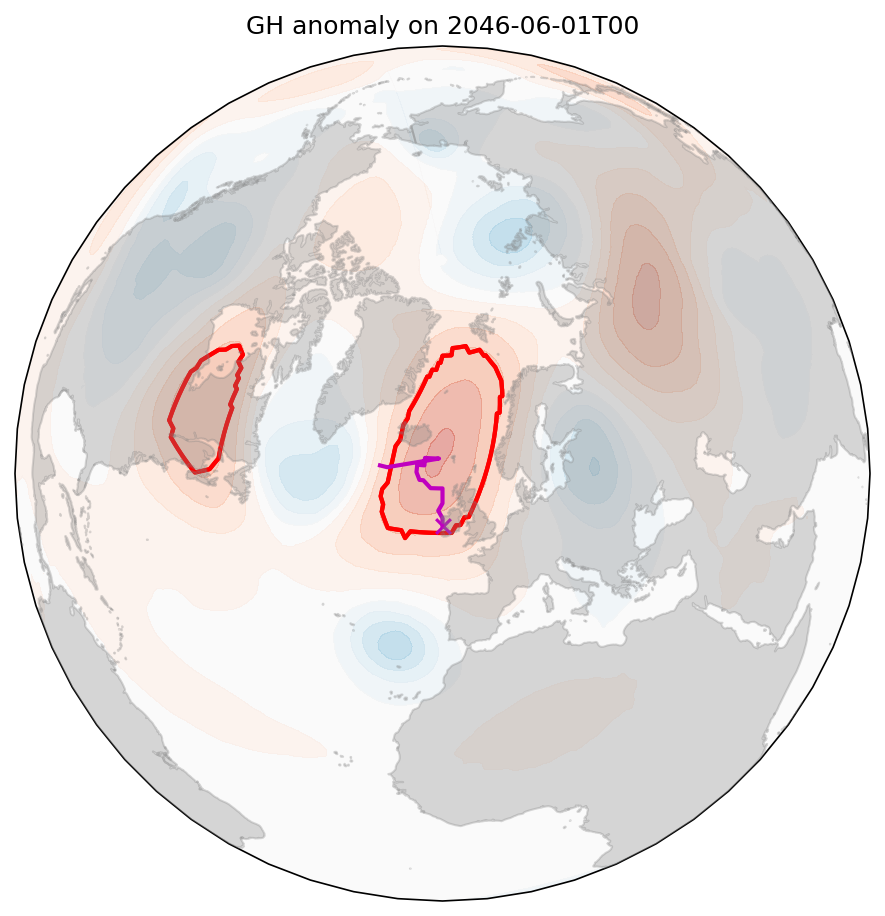

In [72]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.path as mpath

plt.figure(figsize=(14,6),dpi=150)
#fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
lon_0 = -10 #-185
lat_0 =  60.0
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150, subplot_kw={'projection':  ccrs.Orthographic(lon_0, lat_0)})
#fig,ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
#ax.set_boundary(circle, transform=ax.transAxes)


###=== Shaded plots
###msl
#(msl.isel(time=0)*0.01).plot.contour(ax=ax, levels=np.arange(1010,1036,4), colors='k',linewidths=2, transform=ccrs.PlateCarree())

###humidty
#(var2.sel(time=timc)*1000).plot.contourf(ax=ax, levels=np.arange(0.8,5.2,0.2), cmap='GnBu',extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'Humidity [$g/Kg$]'})
###surface temp
#(var4-273).plot.contourf(ax=ax, levels=np.arange(-35,15,5), cmap='BuPu_r', alpha=0.80,extend = 'min', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'tas [$oC$]'})
###TOA OLR
#(var5).plot.contourf(ax=ax, levels=np.arange(150,200,5), cmap='gray', alpha=0.80,extend = 'min', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'OLR [$w/m^2$]'})
### precipitation
#(da.isel(time=0)*1000).plot.contourf(ax=ax, levels=np.arange(0.5,5,0.5), cmap='GnBu', alpha=0.80,extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'pr [$mm/day$]'})
### geop anomaly
##ano.z.sel(time=timb).plot.contourf(ax=ax, levels=np.arange(-500,500,50), cmap='RdBu_r',alpha=0.50, extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'GH [$m$]'})
im1 =ax.contourf(clon, ano.lat,ano_new, levels=np.arange(-500,500,50), cmap='RdBu_r',alpha=0.50, extend = 'max',transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'GH [$m$]'})


###=== Contrack blocks
#flevels=[1463.5, 1464.5] ### flag
rlevels=[0.5,1.5]
#im1=block_ano.flag.sel(time=timb).plot.contour(ax=ax,levels=flevels,colors='r',linewidths=2,extend = 'neither', transform=ccrs.PlateCarree())
im1 =ax.contour(clon, block_ano.lat,block_new, levels=rlevels, colors='r',linewidths=2,extend = 'neither',transform=ccrs.PlateCarree())

# cosmetic: sometimes there is a gap near map edge where track is split:
lonts[lonts >= 355] = 359.9
lonts[lonts <= 3] = 0.1
segment = np.vstack((clonts,clatts))

#move longitude into the map region and split if longitude jumps by more than "threshold"
lon0 = 0 #center of map
bleft = lon0-0.
bright = lon0+360
segment[0,segment[0]> bright] -= 360
segment[0,segment[0]< bleft]  += 360
threshold = 180  # CHANGE HERE
isplit = np.nonzero(np.abs(np.diff(segment[0])) > threshold)[0]
subsegs = np.split(segment,isplit+1,axis=+1)

###plot the tracks
for seg in subsegs:
    x,y = seg[0],seg[1]
    ax.plot(x ,y,c = 'm',linewidth=2, transform=ccrs.PlateCarree())


ax.scatter(lonts[0],latts[0],s=50,c='m',marker="x", zorder=10, transform=ccrs.PlateCarree())

#ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree()); 
##ax.coastlines('110m', alpha=0.5)
import cartopy.feature as cfeature
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

plt.tight_layout()

plt.title("GH anomaly on "+timb[:13], size=12)

plt.savefig('IFS-production_block_'+timb[:13]+'.png')

In [27]:
x=np.arange(0,24*6,6)

In [62]:
str(x[0])

'0'

In [65]:
### Plot intensity over time

#for n in np.arange(1,25):
#    fig,ax=plt.subplots(figsize=(10, 4), dpi=150)
#    inty= np.asarray(block_df['Intensity'].iloc[np.where(block_df['Flag']==bid)]) #'20210326_12'
#    plt.plot(x[0:n],inty[0:n],color='m', linestyle='-', lw=2)
#    plt.plot(x[0:1],inty[0:1], 'mo')
#    ax.set_xlabel("Time (hours)")
#    ax.set_ylabel("GH (m)")
#    ax.set_xlim([0, 140])
#    ax.set_ylim([160, 240])
#    plt.savefig('IFS-production_block_intensity_case_'+str(n)+'.png')

In [79]:
#block_df['Longitude2'] = np.where(block_df['Longitude'] < 0, block_df['Longitude']+360,block_df['Longitude'])

/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/b/b382006/.co

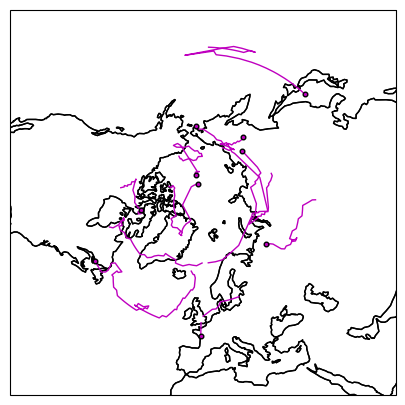

In [81]:
# plotting blocking track (center of mass) and genesis
f, ax = plt.subplots(1, 1, figsize=(7,5), subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
ax.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); ax.coastlines()
ax.coastlines() # add coastlines

#need to split each blocking track due to longitude wrapping (jumping at map edge)
for bid in np.unique(np.asarray(block_df['Flag'][1000:2000])): #select blocking id
    lons = np.asarray(block_df['Longitude2'].iloc[np.where(block_df['Flag']==bid)])
    lats = np.asarray(block_df['Latitude'].iloc[np.where(block_df['Flag']==bid)])

    # cosmetic: sometimes there is a gap near map edge where track is split:
    lons[lons >= 355] = 359.9
    lons[lons <= 3] = 0.1
    segment = np.vstack((lons,lats))

    #move longitude into the map region and split if longitude jumps by more than "threshold"
    lon0 = 0 #center of map
    bleft = lon0-0.
    bright = lon0+360
    segment[0,segment[0]> bright] -= 360
    segment[0,segment[0]< bleft]  += 360
    threshold = 180  # CHANGE HERE
    isplit = np.nonzero(np.abs(np.diff(segment[0])) > threshold)[0]
    subsegs = np.split(segment,isplit+1,axis=+1)

    #plot the tracks
    for seg in subsegs:
        x,y = seg[0],seg[1]
        ax.plot(x ,y,c = 'm',linewidth=1, transform=ccrs.PlateCarree())
    #plot the starting points
    ax.scatter(lons[0],lats[0],s=11,c='m', zorder=10, edgecolor='black', transform=ccrs.PlateCarree())